# Programming in the Scientific Environment 

## Aplications to Astrophysics I. healpy

Basic introduction to healpy. The following healpy modules are studied:

* visufunc: Visualization functions.
* pixelfunc: Pixelation related functions.
* fitsfunc: FITS file related functions
* sphtfunc: Spherical harmonics transforms.

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

###  Reading and writing maps


* Based on the astropy.io.fits module.
* Quick for HEALPix format data.
* Better astropy.io for more general files.

In [4]:
cmb_maps,header = hp.read_map('cmb.fits',field=(0,1,2),verbose=False,h=True,hdu=1, partial=False)
synchrotron_maps = hp.read_map('synchrotron.fits',field=(0,1,2),verbose=False)
dust_maps = hp.read_map('dust.fits',field=(0,1,2),verbose=False)

In [5]:
print(header)

[('XTENSION', 'BINTABLE'), ('BITPIX', 8), ('NAXIS', 2), ('NAXIS1', 12288), ('NAXIS2', 48), ('PCOUNT', 0), ('GCOUNT', 1), ('TFIELDS', 3), ('TTYPE1', 'TEMPERATURE'), ('TFORM1', '1024E'), ('TTYPE2', 'Q_POLARISATION'), ('TFORM2', '1024E'), ('TTYPE3', 'U_POLARISATION'), ('TFORM3', '1024E'), ('PIXTYPE', 'HEALPIX'), ('ORDERING', 'RING'), ('EXTNAME', 'xtension'), ('NSIDE', 64), ('FIRSTPIX', 0), ('LASTPIX', 49151), ('INDXSCHM', 'IMPLICIT'), ('OBJECT', 'FULLSKY')]


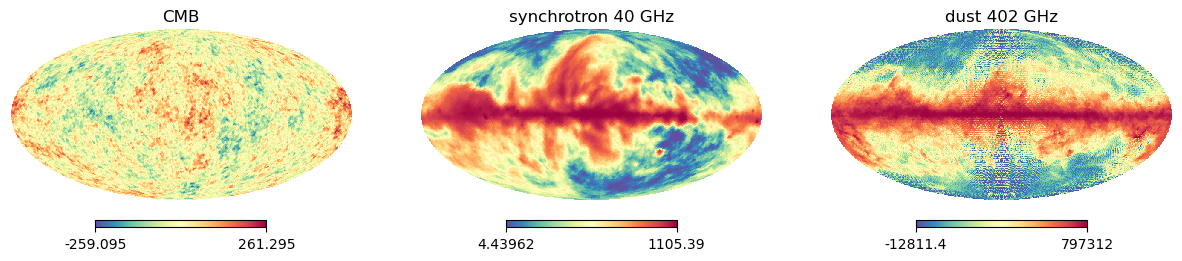

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5))

plt.axes(ax1)
hp.mollview(cmb_maps[0],title='CMB',cmap='Spectral_r',hold=True)

plt.axes(ax2)
hp.mollview(synchrotron_maps[0],title='synchrotron 40 GHz',cmap='Spectral_r',norm='hist',hold=True)

plt.axes(ax3)
hp.mollview(dust_maps[0],title='dust 402 GHz',cmap='Spectral_r',norm='hist',hold=True)

In [7]:
sky_signal = cmb_maps + synchrotron_maps + dust_maps
hp.write_map('sky_signal.fits',sky_signal,overwrite=True)

setting the output map dtype to [dtype('float32'), dtype('float32'), dtype('float32')]


### Visualization

#### Mollweide projection

* Equal-area, pseudo cylindrical map projection. 
* The equator is represented as a straight horizontal line
* The central meridian one-half the equator’s length.
* The other parallels compress near the poles.
* The meridians aree quallyspacedattheequator.
* The meridians at 90 degrees east and west form a perfect circle.
* Whole earth is depicted in a proportional 2:1 ellipse.

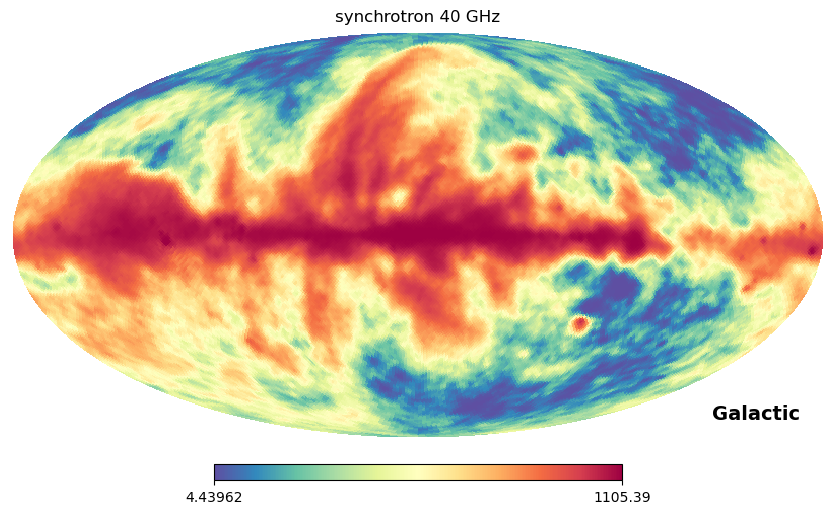

In [8]:
hp.mollview(synchrotron_maps[0],title='synchrotron 40 GHz',coord='G',cmap='Spectral_r',norm='hist')

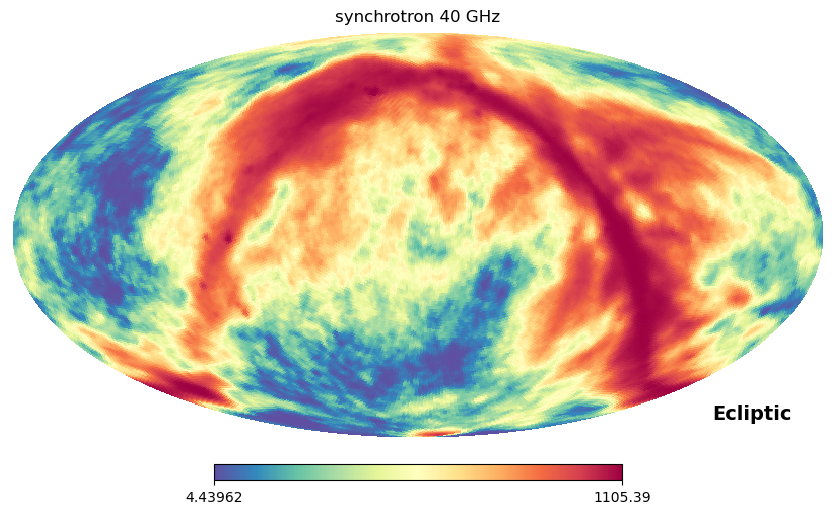

In [9]:
hp.mollview(synchrotron_maps[0],title='synchrotron 40 GHz',coord='GE',cmap='Spectral_r',norm='hist')

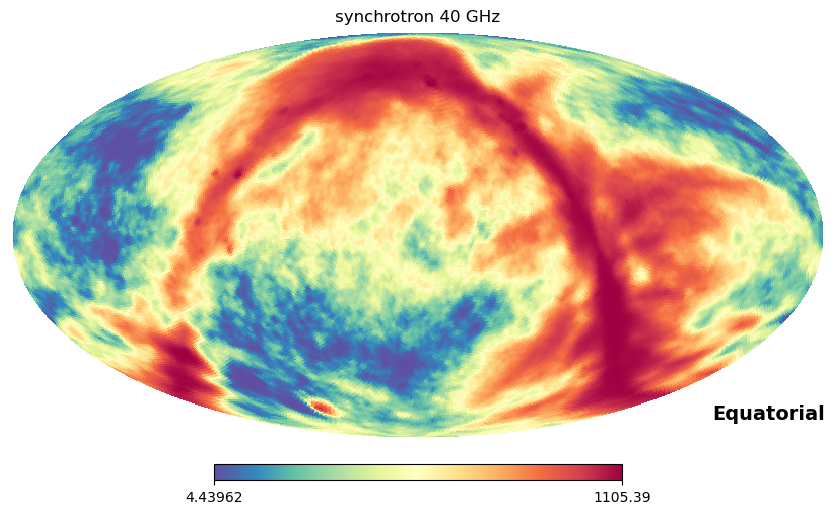

In [10]:
hp.mollview(synchrotron_maps[0],title='synchrotron 40 GHz',coord='GC',cmap='Spectral_r',norm='hist')

#### Orthographic projection

* Azimuthal projection, in which the sphere is projected onto a tangent plane or secant plane.
* The point of perspective for the orthographic projection is at infinite distance.
* It depicts a hemisphere of the globe as it appears from outer space, where the horizon is a great circle.
* The shapes and areas are distorted, particularly near the edges.

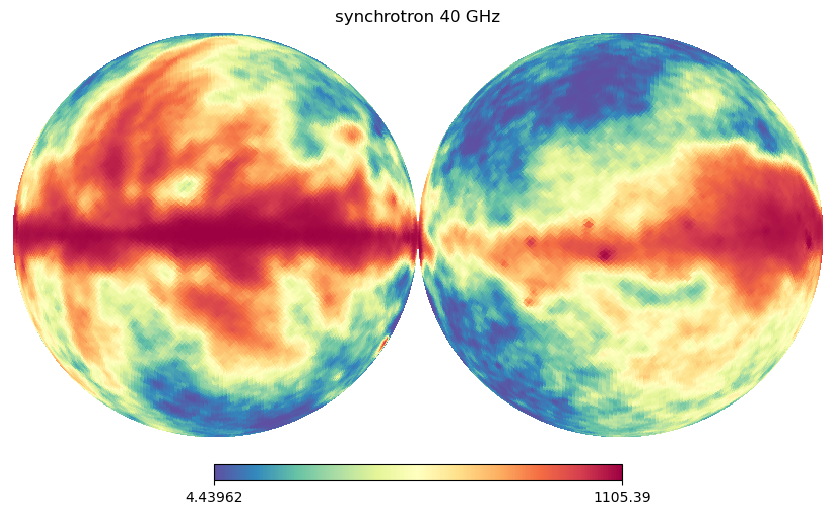

In [11]:
hp.orthview(synchrotron_maps[0],title='synchrotron 40 GHz',rot=[0,0,0],cmap='Spectral_r',norm='hist')

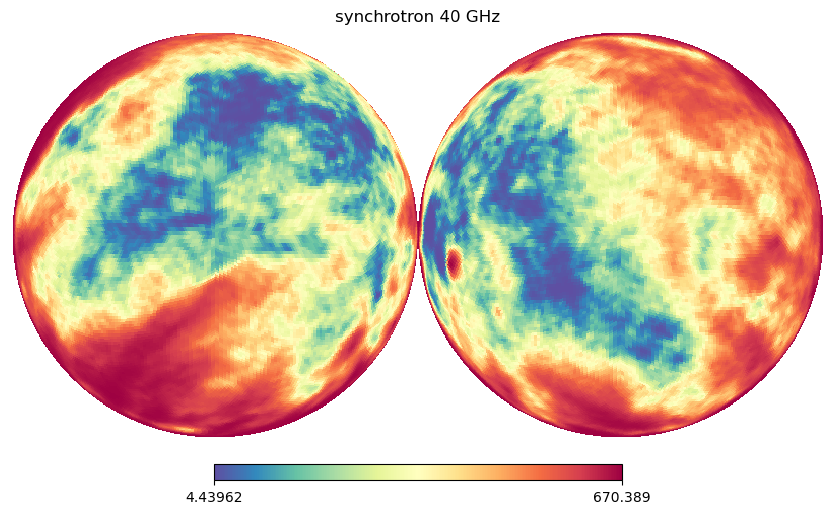

In [12]:
hp.orthview(synchrotron_maps[0],title='synchrotron 40 GHz',rot=[0,90,0],cmap='Spectral_r',norm='hist')

#### Gnomonic projection

* Projection from the centre of a sphere to a plane tangential to the sphere. 
* All great circles are displayed as straight lines.
* Any straight line segment on a gnomonic map shows a geodesic, the shortest route between the segment's two endpoints. 
* No distortion occurs at the tangent point, but distortion increases rapidly away from it. 
* Less than half of the sphere can be projected onto a finite map.

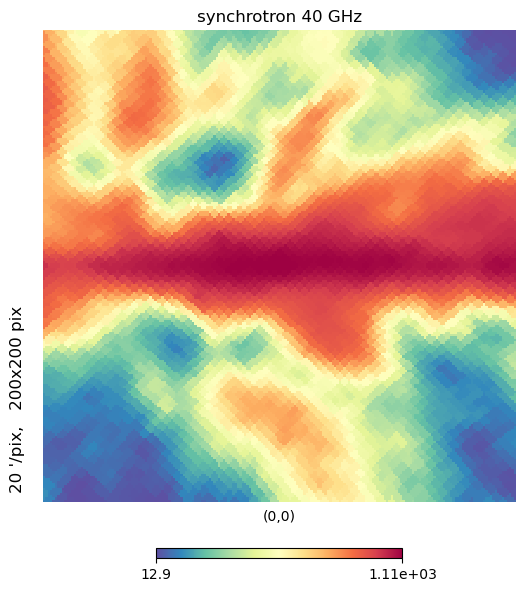

In [13]:
hp.gnomview(synchrotron_maps[0],title='synchrotron 40 GHz',cmap='Spectral_r',rot=[0,0,0],reso=20,norm='hist')

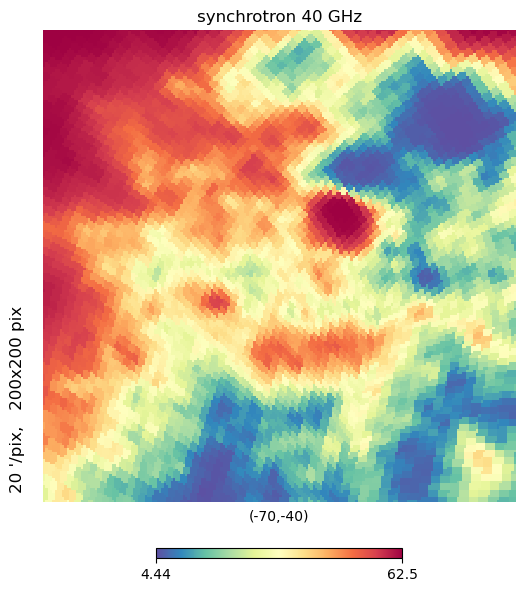

In [14]:
hp.gnomview(synchrotron_maps[0],title='synchrotron 40 GHz',cmap='Spectral_r',rot=[-70,-40,0],reso=20,norm='hist')

#### Cartview

* Projects a portion of the sphere as a flat surface in Cartesian coordinates
* The larger the portion the larger the distorsion

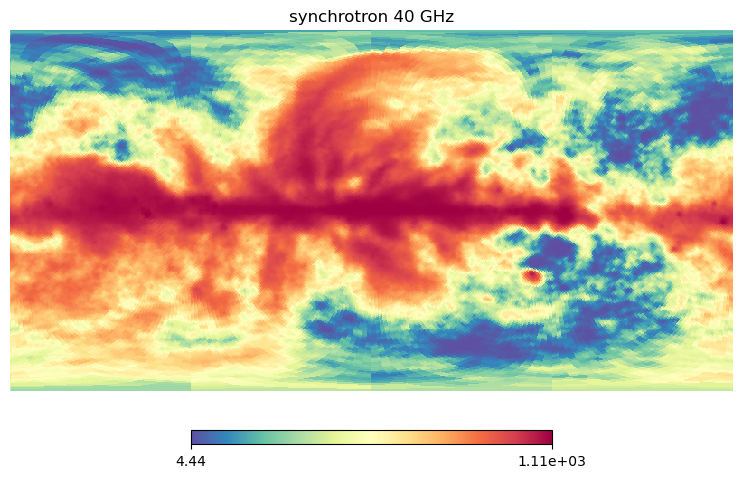

In [15]:
hp.cartview(synchrotron_maps[0],title='synchrotron 40 GHz',cmap='Spectral_r',rot=[0,0,0],norm='hist')

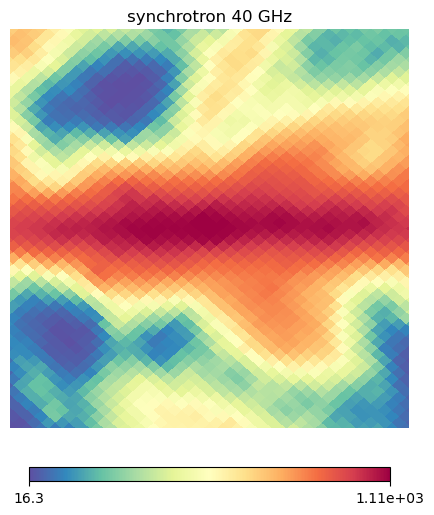

In [16]:
hp.cartview(synchrotron_maps[0],title='synchrotron 40 GHz',cmap='Spectral_r',rot=[0,0,0],lonra=[-20,20],latra=[-20,20],norm='hist')

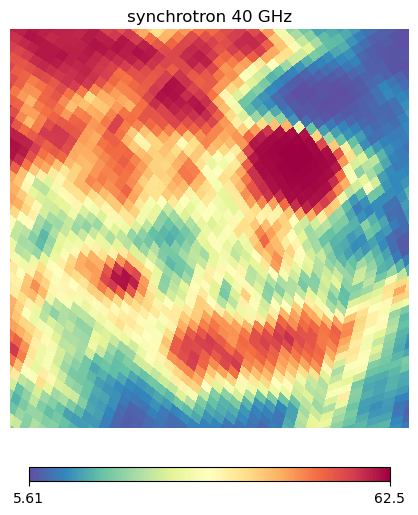

In [17]:
hp.cartview(synchrotron_maps[0],title='synchrotron 40 GHz',cmap='Spectral_r',rot=[-70,-40,0],lonra=[-20,20],latra=[-20,20],norm='hist')

### Indexing scheme.

Comparison between the RING and NESTED schemes available

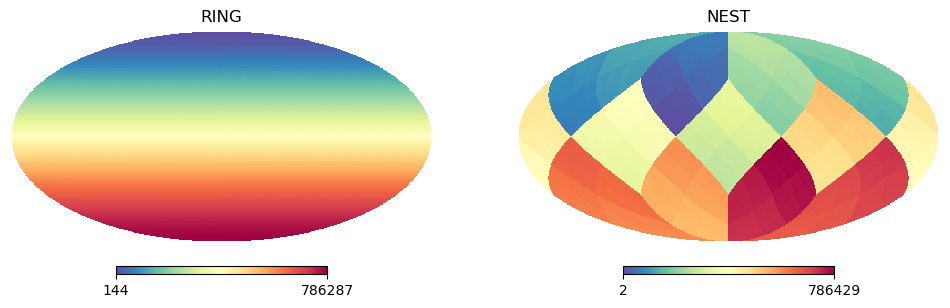

In [18]:
nside = 256
m = np.arange(12*nside**2)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

plt.axes(ax1)
hp.mollview(m,title='RING',cmap='Spectral_r',hold=True)

plt.axes(ax2)
hp.mollview(m,title='NEST',cmap='Spectral_r',nest=True,hold=True)

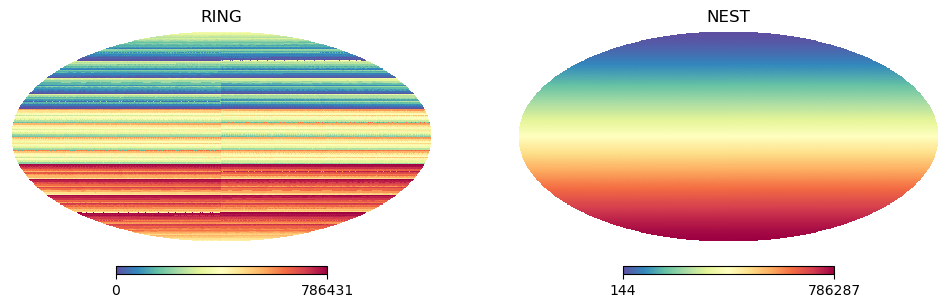

In [21]:
m_nest = hp.reorder(m,inp='RING',out='NESTED')

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

plt.axes(ax1)
hp.mollview(m_nest,title='RING',cmap='Spectral_r',hold=True)

plt.axes(ax2)
hp.mollview(m_nest,title='NEST',cmap='Spectral_r',nest=True,hold=True)

### Nside/Npix/Resolution conversions

Some examples of handy functions. There are a lot more. Check [healpy documentation](https://healpy.readthedocs.io/en/latest/healpy_pix.html).

In [22]:
# Give the number of pixels for the given nside.
nside = 256
npix = hp.nside2npix(nside)
print(npix)

786432


In [16]:
# Give the nside parameter for the given number of pixels.
print(hp.npix2nside(12582912))

1024


In [24]:
# Give the resolution order for a given nside.
print(hp.nside2order(2**5))

5


#### Masking pixels

In [25]:
mask = hp.read_map('quijote_mask64.fits',verbose=False,dtype=np.int)
masked_synchrotron_maps = hp.ma(synchrotron_maps)
masked_synchrotron_maps.mask = 1 - mask

/tmp/ipykernel_72/2857461731.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = hp.read_map('quijote_mask64.fits',verbose=False,dtype=np.int)


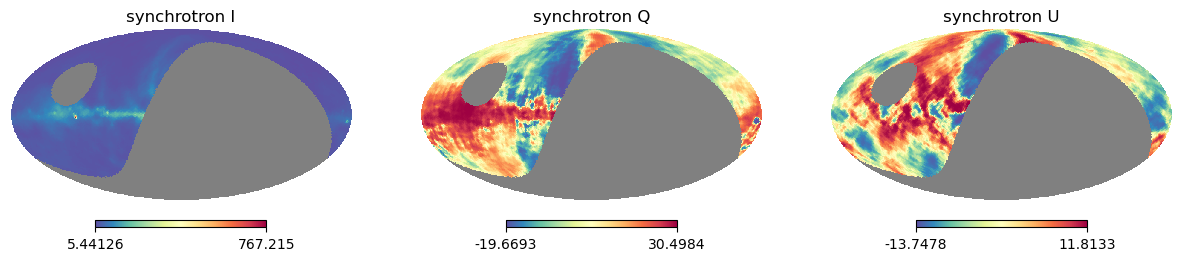

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5))

plt.axes(ax1)
hp.mollview(masked_synchrotron_maps[0],title='synchrotron I',cmap='Spectral_r',hold=True)

plt.axes(ax2)
hp.mollview(masked_synchrotron_maps[1],title='synchrotron Q',cmap='Spectral_r',norm='hist',hold=True)

plt.axes(ax3)
hp.mollview(masked_synchrotron_maps[2],title='synchrotron U',cmap='Spectral_r',norm='hist',hold=True)

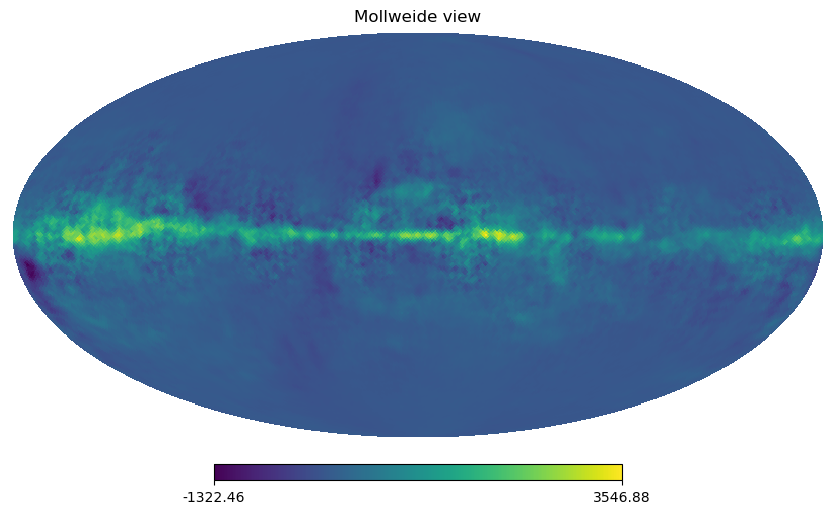

In [27]:
hp.mollview(dust_maps[1])

dust_maps[1][np.abs(dust_maps[1])> 1000] = hp.UNSEEN

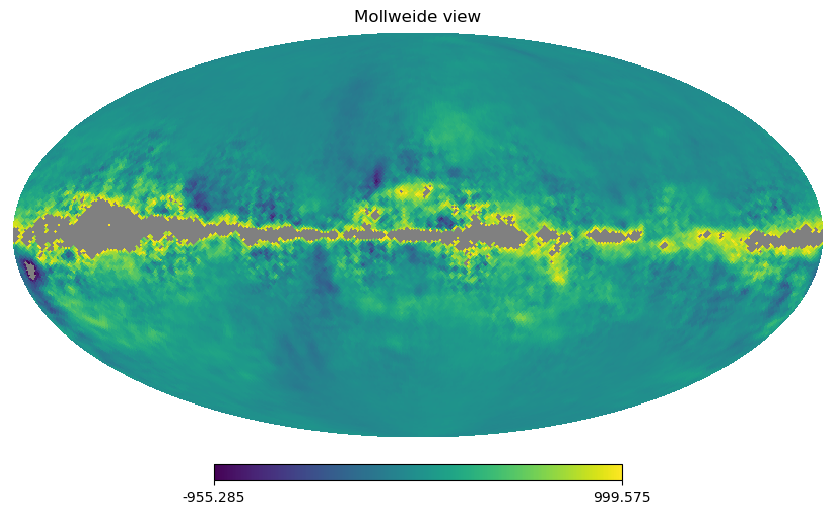

In [28]:
hp.mollview(dust_maps[1])

### Spherical harmonics

In [17]:
nside = hp.get_nside(cmb_maps[0])
alm = hp.map2alm(cmb_maps,lmax=3*nside-1)
cls = hp.anafast(cmb_maps,lmax=3*nside-1)
new_map_alm = hp.alm2map(alm,nside,pixwin=False,fwhm=0,verbose=False)
new_map_cls = hp.synfast(cls,256,new=True,verbose=False)

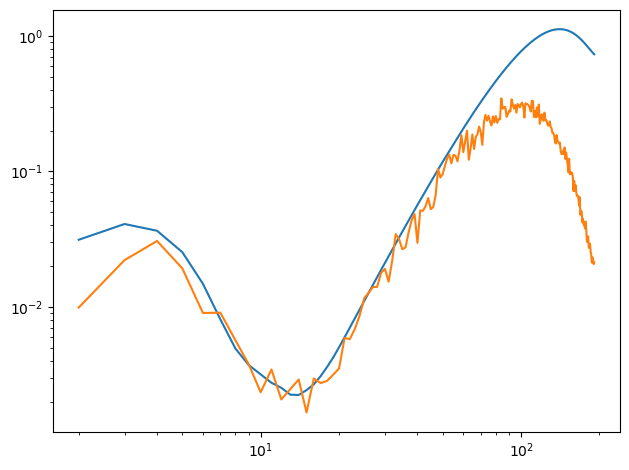

In [11]:
theoretical_dls = np.loadtxt('dls_lensed_r_0.dat')

ell_max = 3*nside
ells = theoretical_dls[:ell_max-2,0]
cls2dls = ells*(ells+1)/(2*np.pi)

d_mode = {'TT':0,'EE':1,'BB':2}
mode = 'EE'
fig, ax = plt.subplots()

ax.plot(ells,theoretical_dls[:ell_max-2,d_mode[mode]+1])
ax.plot(ells,cls[d_mode[mode],2:]*cls2dls)

ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()

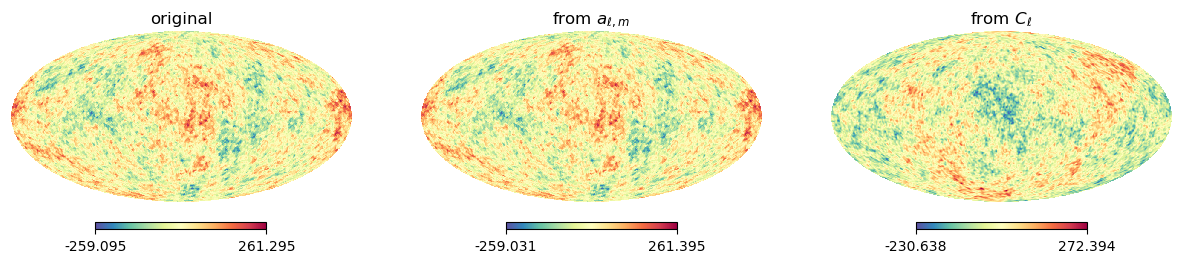

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,5))

plt.axes(ax1)
hp.mollview(cmb_maps[0],title='original',cmap='Spectral_r',hold=True)

plt.axes(ax2)
hp.mollview(new_map_alm[0],title=r'from $a_{\ell,m}$',cmap='Spectral_r',hold=True)

plt.axes(ax3)
hp.mollview(new_map_cls[0],title=r'from $C_{\ell}$',cmap='Spectral_r',hold=True)

Gaussian Filters

$$g(x) = \dfrac{1}{\sigma\sqrt{2\pi}}\exp{\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^2}$$

In [21]:
nside = 126
lmax = 3*nside-1
fwhm = np.deg2rad(2)
fl = hp.gauss_beam(fwhm,lmax=lmax)

In [22]:
cls2dls = theoretical_dls[:,0]*(theoretical_dls[:,0]+1)/(2*np.pi)
theoretical_cls = np.vstack((np.zeros((2,theoretical_dls[...,1:].shape[1])),theoretical_dls[:,1:]*cls2dls[...,np.newaxis]**(-1)))
   

alm = hp.synalm(theoretical_cls.T,lmax=lmax,new=True,verbose=False)
cls = hp.alm2cl(alm) 
smooth_alm = np.array([hp.almxfl(el,fl) for el in alm])
smooth_cls = hp.alm2cl(smooth_alm) 

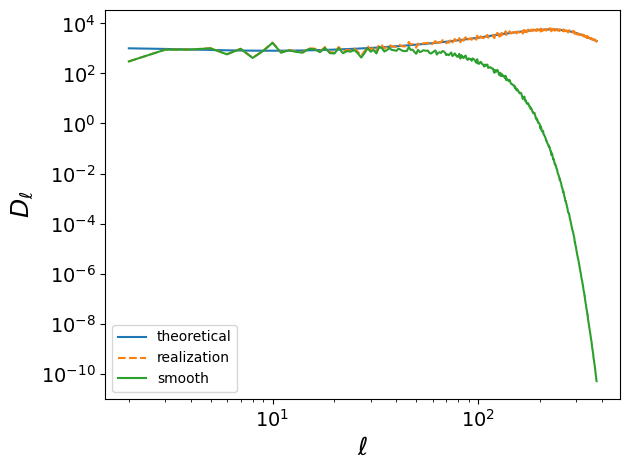

In [20]:
mode = 'TT'

ells = np.arange(lmax+1)
cls2dls = (ells*(ells+1)/(2*np.pi))[2:]
fig, ax = plt.subplots()

ax.plot(ells[2:],theoretical_cls[2:lmax+1,d_mode[mode]]*cls2dls,label='theoretical')
ax.plot(ells[2:],cls[d_mode[mode],2:]*cls2dls,linestyle='--',label='realization')
ax.plot(ells[2:],smooth_cls[d_mode[mode],2:]*cls2dls,label='smooth')

ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel(r'$\ell$',fontsize=18)
ax.set_ylabel(r'$D_{\ell}$',fontsize=18)
ax.legend(loc='best')

plt.tight_layout()